# Polynomial fitting on a dataset using linear regression

In this activity we will use linear regression package from Scikit to fit a polynomial on a sample data set. We will also discuss under fitting and over fitting of a polynomial. First of all we will import all the necessary libraries.

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

%matplotlib inline

Create a set of sample data points. We will calculate the value of the function y = 1 + 2sin(5x) - sin(15x) for each value of the sample value x. We kept the range of x between 0 and 1. Also while calculating y we will add a random error to each value so that we get a set of scattered data points to represent real life scenarios. And then plot the points on a scatter plot.

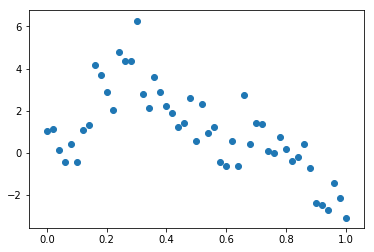

In [91]:
x = np.linspace(0,1,51) #select variables
y = []
y_tru = []
for i in x:
    func_x = 1 + (2 * math.sin(5*i)) - math.sin(15 * i)
    func_y = func_x + random.gauss( 0, 1)
    y.append(func_y)
    y_tru.append(func_x)
    
plt.scatter(x, y); #plot our simulated data

Once we have a dataset to work with we will try to fit a line equation on the dataset.

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
X = x[:, np.newaxis]

In [96]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Checking out the coeffiecnt and intercept of the equation.

In [97]:
model.coef_[0]

-4.050324352326586

In [98]:
model.intercept_

3.066616274020949

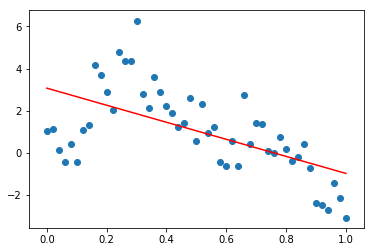

In [99]:
x1 = np.linspace(0, 1, 100)
plt.scatter(x, y)
plt.plot(x1, (model.intercept_ + (model.coef_[0]*x1)), color = 'red')

From the plot we can see that a line model is following the trend of the  data but it is not a good fit. Using this model will have a lot of error when calculating values. In this situation the curve is under fitting. It is not able to fully capture the  nature of the dataset.

Now we'll try to fit a polynomial of degree 7. We will to create a matrix in which there is a constant term for the first column and then each column of x is a power of x untill it reaches the degree of the polynomial required. For example if we are creating a 2nd degree polynomial then such as y = const + b1(x) + b2(x^2) then the matrix will be [1, x, x^2]. This will done for each value of x.

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
yn = np.asarray(y)

In [102]:
Y = yn[:, np.newaxis]

In [103]:
model1 = PolynomialFeatures(degree=7)
X_poly = model1.fit_transform(X)

In [105]:
model.fit(X_poly,Y)
y_poly_pred = model.predict(X_poly)

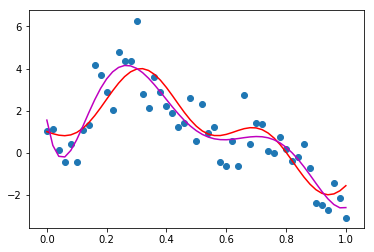

In [110]:
plt.scatter(x, y)
plt.plot(x,y_tru, color='red')
plt.plot(x, y_poly_pred, color='m')
plt.show()

From this we see that the polynomial is better fitting now to the dataset we created. The red curve is the truw curve. Let's see what will happen when we increase the number of degress to 16.

In [111]:
model2 = PolynomialFeatures(degree=16)
X_poly2 = model2.fit_transform(X)

In [112]:
model.fit(X_poly2,Y)
y_poly_pred2 = model.predict(X_poly2)

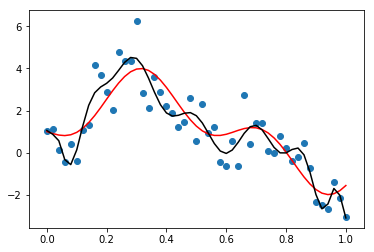

In [113]:
plt.scatter(x, y)

plt.plot(x,y_tru, color='red')
plt.plot(x, y_poly_pred2, color='black')
plt.show()

For the 16th degree polynomial we can see that the polynomial is following the trend of the data set very closely but it is sometimes either over estimating or under estimating the curve in many locations as compared to the true curve. This is a case of over fitting a polynomial to a data set. 

When estimating a fitting curve for the dataset one has to be careful about overfitting and underfitting a curve on a data set. Both kind of situations create error while predicting values from a data set.